In [3]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os

c:\Users\gabin\OneDrive\Bureau\Projets Perso\AI-ChatBot-for-costumer-support\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load The dataset

In [4]:
path = kagglehub.dataset_download("bitext/bitext-gen-ai-chatbot-customer-support-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\gabin\.cache\kagglehub\datasets\bitext\bitext-gen-ai-chatbot-customer-support-dataset\versions\1


In [5]:
csv_file_path = f"{path}/Bitext_Sample_Customer_Support_Training_Dataset_27K_responses-v11.csv"

try:
  df = pd.read_csv(csv_file_path)
  print("CSV file successfully loaded into a pandas DataFrame.")
except Exception as e:
  print(f"An error occurred while loading the CSV file: {e}")

CSV file successfully loaded into a pandas DataFrame.


## Exploration

In [6]:
df

,flags,instruction,category,intent,response
0,B,question about cancelling order {{Order Number}},ORDER,cancel_order,I've understood you have a question regarding ...
1,BQZ,i have a question about cancelling oorder {{Or...,ORDER,cancel_order,I've been informed that you have a question ab...
2,BLQZ,i need help cancelling puchase {{Order Number}},ORDER,cancel_order,I can sense that you're seeking assistance wit...
3,BL,I need to cancel purchase {{Order Number}},ORDER,cancel_order,I understood that you need assistance with can...
4,BCELN,"I cannot afford this order, cancel purchase {{...",ORDER,cancel_order,I'm sensitive to the fact that you're facing f...
...,...,...,...,...,...
26867,BL,I am waiting for a rebate of {{Refund Amount}}...,REFUND,track_refund,Thank you for sharing your situation regarding...
26868,BIL,how to see if there is anything wrong with my ...,REFUND,track_refund,Ensuring the accuracy of your restitution is o...
26869,BLQZ,I'm waiting for a reimbjrsement of {{Currency ...,REFUND,track_refund,"Firstly, I genuinely understand the importance..."
26870,BL,I don't know what to do to see my reimbursemen...,REFUND,track_refund,I've understood you're unsure about how to che...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26872 entries, 0 to 26871
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   flags        26872 non-null  object
 1   instruction  26872 non-null  object
 2   category     26872 non-null  object
 3   intent       26872 non-null  object
 4   response     26872 non-null  object
dtypes: object(5)
memory usage: 1.0+ MB


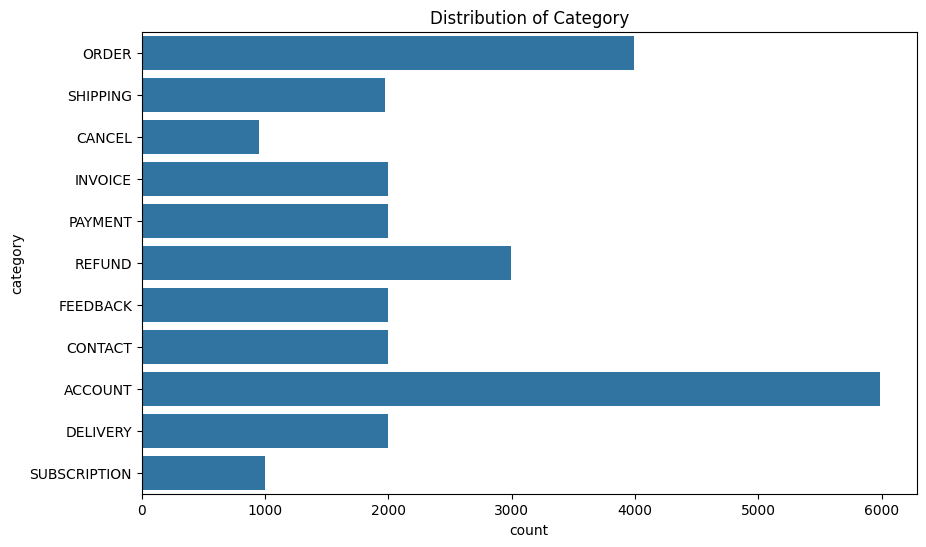

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='category')
plt.title("Distribution of Category")
plt.show()

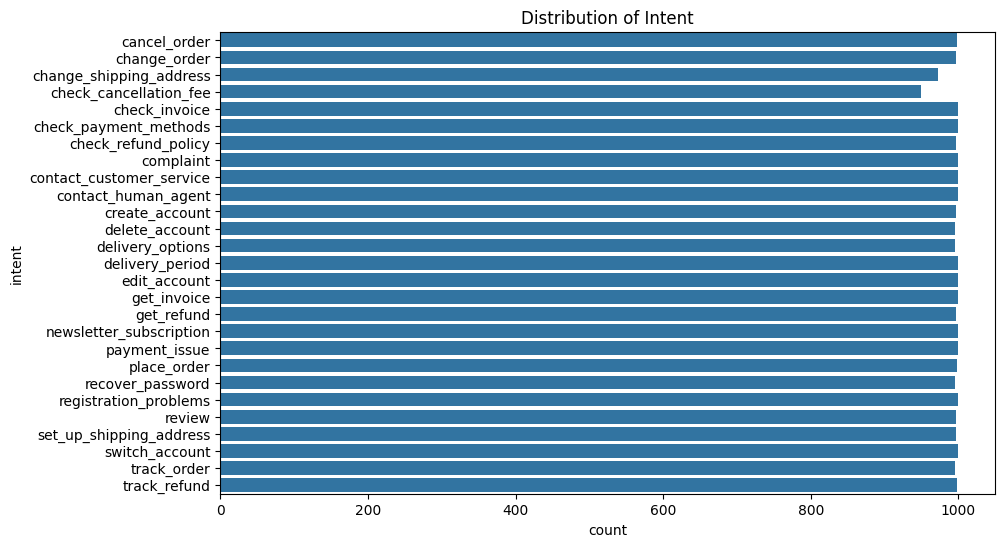

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='intent')
plt.title("Distribution of Intent")
plt.show()

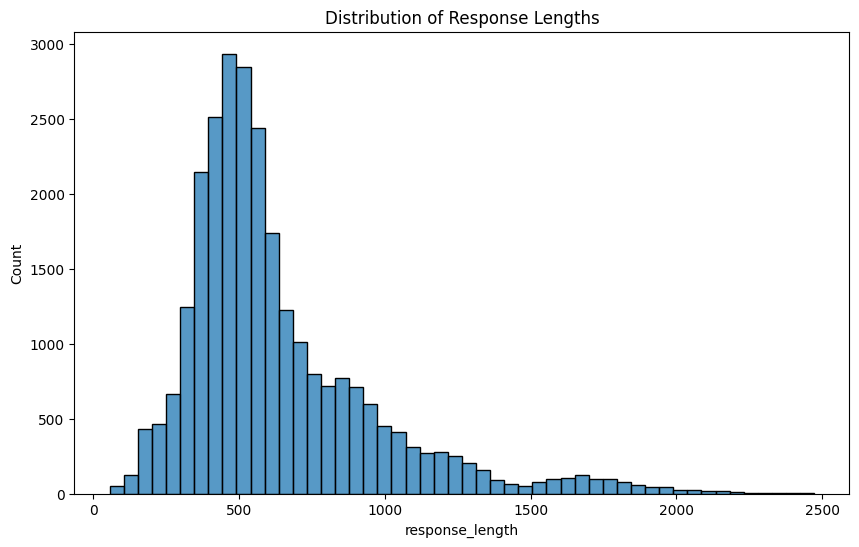

In [10]:
df['response_length'] = df['response'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['response_length'], bins=50)
plt.title("Distribution of Response Lengths")
plt.show()

In [12]:
length_stats = df['response_length'].agg(['mean', 'min', 'max', 'median', 'std'])
length_stats

mean       634.104495
min         57.000000
max       2472.000000
median     540.000000
std        331.593822
Name: response_length, dtype: float64

## Data Cleanup

In [13]:
dataset = df.copy()
dataset = dataset.rename(columns={"instruction": "Question"})
dataset = dataset.rename(columns={"response": "Answer"})
dataset = dataset.drop(columns=['flags','category', 'intent', 'response_length'])

dataset = dataset.sample(n=200, random_state=42)
dataset

,Question,Answer
9329,I can't talk with a human agent,Thank you for reaching out! I'm sorry to hear ...
4160,I have got to locate hte bills from {{Person N...,I'll get right on it! I understand your need t...
18500,"I cannot pay, help me to inform of a problem w...",I apologize for the inconvenience caused by th...
8840,I want help speaking to customer service,Grateful for your contact! I get the sense tha...
5098,I try to see th accepted payment options,Thank you for reaching out! I completely under...
...,...,...
7757,where can i lodge a customer claim,"I'm on the same page, your need to lodge a cus..."
15382,I need assistance to dfownload my invoice #37777,I'll do my best! I completely understand your ...
15244,get invoice #85632,Assuredly! I understand that you need assistan...
2662,how do I update the shipping address?,"Sure, I can help you with updating your shippi..."


In [14]:
dataset.to_csv("support_data.csv", index=False)

## Embedding

In [15]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('paraphrase-MiniLM-L3-v2')
dataset['question_embedding'] = dataset['Question'].apply(lambda x: model.encode(x))
print(dataset.head())

first_question_embedding = dataset.iloc[0]['question_embedding']
# print(first_question_embedding)
print(first_question_embedding.shape)

c:\Users\gabin\OneDrive\Bureau\Projets Perso\AI-ChatBot-for-costumer-support\venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\gabin\.cache\huggingface\hub\models--sentence-transformers--paraphrase-MiniLM-L3-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but

                                                Question  \
9329                    I can't talk with  a human agent   
4160   I have got to locate hte bills from {{Person N...   
18500  I cannot pay, help me to inform of a problem w...   
8840            I want help speaking to customer service   
5098            I try to see th accepted payment options   

                                                  Answer  \
9329   Thank you for reaching out! I'm sorry to hear ...   
4160   I'll get right on it! I understand your need t...   
18500  I apologize for the inconvenience caused by th...   
8840   Grateful for your contact! I get the sense tha...   
5098   Thank you for reaching out! I completely under...   

                                      question_embedding  
9329   [-0.06596276, -0.33130276, -0.004084919, -0.33...  
4160   [-0.37776387, 0.23040724, 0.2632818, -0.123068...  
18500  [-0.08627701, -0.25411257, -0.17886482, -0.064...  
8840   [-0.29558468, -0.14393172, 0.081653

## ChatBot system

In [16]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os

path = kagglehub.dataset_download("bitext/bitext-gen-ai-chatbot-customer-support-dataset")

print("Path to dataset files:", path)
csv_file_path = f"{path}/Bitext_Sample_Customer_Support_Training_Dataset_27K_responses-v11.csv"

try:
  df = pd.read_csv(csv_file_path)
  print("CSV file successfully loaded into a pandas DataFrame.")
except Exception as e:
  print(f"An error occurred while loading the CSV file: {e}")

df['response_length'] = df['response'].apply(len)
dataset = df.copy()
dataset = dataset.rename(columns={"instruction": "Question"})
dataset = dataset.rename(columns={"response": "Answer"})
dataset = dataset.drop(columns=['flags','category', 'intent', 'response_length'])

df_test = dataset.sample(n=10, random_state=42)
dataset = dataset.sample(n=200, random_state=42)
df_test

Path to dataset files: C:\Users\gabin\.cache\kagglehub\datasets\bitext\bitext-gen-ai-chatbot-customer-support-dataset\versions\1
CSV file successfully loaded into a pandas DataFrame.


,Question,Answer
9329,I can't talk with a human agent,Thank you for reaching out! I'm sorry to hear ...
4160,I have got to locate hte bills from {{Person N...,I'll get right on it! I understand your need t...
18500,"I cannot pay, help me to inform of a problem w...",I apologize for the inconvenience caused by th...
8840,I want help speaking to customer service,Grateful for your contact! I get the sense tha...
5098,I try to see th accepted payment options,Thank you for reaching out! I completely under...
17250,where to sign up to the company nmewsletter,Thank you for your interest in signing up for ...
3589,I'd like to see the withdrwaal fee how can i d...,"I'll do my best! To view the withdrawal fee, y..."
9043,I want to speak with someone,I see what you mean! I'm on the same page that...
15800,can you help me getting bill #85632?,I'll take care of it! I completely understand ...
4384,I don't know how to take a quick look at invoi...,I've realized you're unsure about how to quick...


In [ ]:
import os
from dotenv import load_dotenv
from huggingface_hub import login, whoami

load_dotenv()

token = os.getenv("HUGGINGFACEHUB_TOKEN")
if token is None:
    raise ValueError("Le token Hugging Face n’a pas été trouvé dans .env !")

login(token)

info = whoami()
print(f"Connecté en tant que : {info['name']}")


Connecté en tant que : GabynFt


In [ ]:
from langchain.chains import RetrievalQA
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings import SentenceTransformerEmbeddings
from langchain_community.llms import HuggingFacePipeline
from transformers.pipelines import pipeline
from transformers import AutoTokenizer, AutoModelForCausalLM
import tempfile
import os
import torch

# ===== CONFIGURATION =====
EMBEDDING_MODEL = "paraphrase-MiniLM-L6-v2"
GENERATOR_MODEL = "model-hub/Mistral-7B-Instruct-v0.2"
FEW_SHOT_EXAMPLES = [
    {"question": "I can't talk with a human agent", "answer": "Thank you for reaching out! I'm sorry to hear that you're facing difficulties in connecting with a human agent. Please rest assured that I'm here to assist you and resolve this issue. Could you please provide me with some more details about the problem you're experiencing? This will help me find the best solution for you."},
    {"question": "I have got to locate hte bills from {{Person Name}}", "answer": "I'll get right on it! I understand your need to locate the bills associated with {{Person Name}}. To assist you in finding the relevant invoices, could you please provide me with some additional details such as the date range or any other specific information that might help narrow down the search? Rest assured, I'm here to guide you every step of the way and ensure a seamless experience."},
    {"question": "I cannot pay, help me to inform of a problem with payments", "answer": "I apologize for the inconvenience caused by the payment issue you're experiencing. I understand how frustrating it can be when you encounter difficulties while trying to make a payment. Rest assured, I'm here to assist you in resolving this problem. To help us further investigate and address the issue, could you please provide more details about the problem you are encountering? Any specific error messages or steps leading up to the issue would be helpful. Your input is valuable, and we're committed to finding a solution together. Thank you for bringing this to our attention, and we'll work diligently to get it sorted."},
    {"question": "I want help speaking to customer service", "answer": "Grateful for your contact! I get the sense that you're looking for assistance in speaking to our customer service team. I'm here to guide you through the process and ensure that you have a seamless experience. To connect with our customer service, you can reach them during {{Customer Support Hours}}. If you have any other questions, concerns, or experiences you'd like to share, please feel free to let me know. I'm here to help!"},
    {"question": "I try to see th accepted payment options", "answer": "Thank you for reaching out! I completely understand that you tried to access the accepted payment options on our platform. I apologize for any inconvenience caused. Allow me to assist you in viewing our available payment methods. To check the accepted payment options, you can visit our website's \"Payment\" or \"Checkout\" page. There, you will find a comprehensive list of the various payment methods we accept. If you encounter any difficulties or have further questions, please don't hesitate to let me know. Your satisfaction is our priority, and I'm here to ensure a seamless payment experience for you."},
]

print(f"📚 {len(dataset)} documents chargés")

# ===== COMPONENTS =====
print("🔧 Configuration des composants...")

embedding_function = SentenceTransformerEmbeddings(model_name=EMBEDDING_MODEL)
print("✅ Embeddings configurés")

vectorstore = Chroma.from_texts(
    texts=dataset['Question'].tolist(),
    metadatas=[{
        "answer": dataset['Answer'].iloc[i] if 'Answer' in dataset.columns else "",
        "index": i
    } for i in range(len(dataset))],
    embedding=embedding_function
)
print("✅ Vectorstore créé")

tokenizer = AutoTokenizer.from_pretrained(GENERATOR_MODEL)
model = AutoModelForCausalLM.from_pretrained(
    GENERATOR_MODEL,
    use_auth_token=True,
    device_map="auto",
    torch_dtype=torch.float16
)

generator_pipeline = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    max_new_tokens=1000,
    #temperature=0.1,
    do_sample=False,
    pad_token_id=tokenizer.eos_token_id,

    return_full_text=False
)

llm = HuggingFacePipeline(pipeline=generator_pipeline)
print("✅ Générateur configuré")

# ===== CUSTOM RAG CLASS =====
class CustomRAG:
    def __init__(self, vectorstore, llm, examples=None):
        self.vectorstore = vectorstore
        self.llm = llm
        self.retriever = vectorstore.as_retriever(search_kwargs={"k": 3})
        self.examples = examples or []

    def format_prompt(self, question, contexts):
        # Incorporate few-shot examples
        few_shot = "".join([
            f"Q:{ex['question']}\nA: {ex['answer']}\n\n"
            for ex in self.examples
        ])
        context_text = "\n\n".join([
            f"{doc.metadata.get('answer', 'N/A')}"
            for i, doc in enumerate(contexts)
        ])
        prompt = (
            "You are a friendly, empathetic customer-support assistant who always uses polite, human-like language "
            "and addresses the user with respect.\n"
            "Give answers in <3 sentences and ask for clarification if needed.\n\n"
            f"Examples:\n{few_shot}\n"
            f"Contexts:\n{context_text}\n\n"
            f"Question: {question}\n"
            "Answer:\n"
        )
        return prompt

    def query(self, question):
        """Process a question with the RAG system"""
        try:
            # 1. Retrieve relevant documents
            relevant_docs = self.retriever.get_relevant_documents(question)

            # 2. If documents with direct answers are found
            for doc in relevant_docs:
                if doc.metadata.get('answer'):
                    # Check relevance
                    if self.is_relevant(question, doc.page_content):
                        return doc.metadata['answer']

            # 3. Generate with LLM if no direct answer
            print("⚠️ No document with direct answer found. Generating with LLM...")
            prompt = self.format_prompt(question, relevant_docs)
            response = self.llm(prompt)

            # Clean the response
            return self.clean_response(response)

        except Exception as e:
            return f"Error processing: {str(e)}"

    def is_relevant(self, question, context):
        """Check basic relevance"""
        question_words = set(question.lower().split())
        context_words = set(context.lower().split())

        # If at least 30% of the question words are in the context
        overlap = len(question_words & context_words)
        return overlap / len(question_words) >= 0.3

    def clean_response(self, response):
        """Clean the generated response"""
        if isinstance(response, list):
            response = response[0] if response else ""

        # Remove repetitions and clean
        lines = response.split('\n')
        cleaned_lines = []
        seen = set()

        for line in lines:
            line = line.strip()
            if line and line not in seen:
                cleaned_lines.append(line)
                seen.add(line)

        return '\n'.join(cleaned_lines)

# 4. Initialize the custom RAG system
rag_system = CustomRAG(vectorstore, llm)
print("✅ Custom RAG system ready")

# ===== IMPROVED TEST FUNCTION =====
def ask_question(question):
    """
    Ask a question to the improved RAG system
    """
    print(f"\n🔍 Question: {question}")
    print("🤔 Searching...")

    try:
        # Get the response
        response = rag_system.query(question)
        print(f"✅ Response: {response}")
        return response
    except Exception as e:
        error_msg = f"❌ Error: {str(e)}"
        print(error_msg)
        return error_msg

# ===== TESTS =====
print("\n" + "="*60)
print("🚀 TESTING IMPROVED RAG SYSTEM: Reformulated Questions")
print("="*60)

# Test with example data

reformulated_sample_test =  [
  {
    "question": "How can I view the accepted payment methods?",
    "answer": "Thank you for reaching out! I completely understand that you tried to access the accepted payment options on our platform. I apologize for any inconvenience caused. Allow me to assist you in viewing our available payment methods. To check the accepted payment options, you can visit our website's \"Payment\" or \"Checkout\" page. There, you will find a comprehensive list of the various payment methods we accept. If you encounter any difficulties or have further questions, please don't hesitate to let me know. Your satisfaction is our priority, and I'm here to ensure a seamless payment experience for you."
  },
  {
    "question": "What are the steps to sign up for the company newsletter?",
    "answer": "Thank you for your interest in signing up for our company newsletter! To subscribe, you can visit our website at {{Website URL}} and navigate to the newsletter section. There you will find a sign-up form where you can enter your email address and other required information. Once you submit the form, you will be successfully subscribed to our newsletter and receive regular updates directly in your inbox. If you require any further assistance or have any questions, please don't hesitate to let me know."
  },
  {
    "question": "Where do I find the breakdown of withdrawal fees in my account?",
    "answer": "I'll do my best! To view the withdrawal fee, you can log in to your account and navigate to the \"Fee Schedule\" or \"Account Charges\" section. This will provide you with the details of the withdrawal fee and any associated charges."
  },
  {
    "question": "How can I connect with a live human agent?",
    "answer": "I see what you mean! I'm on the same page that you would like to speak with someone. Your request is important, and I'm here to help. Let me quickly connect you with a human representative who will be able to assist you further. Kindly stay on the line while I transfer you."
  },
  {
    "question": "Can you help me retrieve invoice #85632 from my billing history?",
    "answer": "I'll take care of it! I completely understand your request to access the bill with the number #{{Invoice Number}}. Please allow me a moment to retrieve the bill for you. In the meantime, if you have any other questions or concerns, feel free to let me know. I'm here to assist you!"
  },
  {
    "question": "What’s the quickest way to find invoice #12588 on my dashboard?",
    "answer": "I've realized you're unsure about how to quickly access the details of invoice #{{Invoice Number}}. Allow me to guide you through the process. To take a quick look at your invoice, you can log in to your account on our website and navigate to the \"Billing\" or \"Invoice\" section. There, you should be able to find a list of your invoices, including invoice #{{Invoice Number}}. Clicking on the invoice will provide you with a detailed view of the charges, due date, and any other relevant information. If you encounter any difficulties during this process, please don't hesitate to reach out to our customer support team, who will be happy to assist you further."
  }
]


for i, item in enumerate(reformulated_sample_test):
    q = item['question']
    r = item['answer']
    print(f"\n--- Test {i+1} ---")
    result = ask_question(q)
    print(f"📋 Expected Response: {r}")


# ===== SIMPLE FALLBACK ALTERNATIVE  =====
def simple_rag_fallback(question):
    """
    Simple fallback version if LLM doesn't work
    """
    print(f"\n🔍 Question: {question}")

    # Direct search in documents
    relevant_docs = vectorstore.similarity_search(question, k=3)

    if relevant_docs:
        best_match = relevant_docs[0]
        if best_match.metadata.get('answer'):
            print(f"✅ Answer found: {best_match.metadata['answer']}")
            return best_match.metadata['answer']

    print("❌ No answer found")
    return "Sorry, I couldn't find an answer to your question."

# To test the simple version
print("\n" + "="*40)
print("🔄 TESTING SIMPLE VERSION")
print("="*40)

# Test the simple version
simple_rag_fallback("payment options")
simple_rag_fallback("help checking payment")


## Interactive Chat

In [ ]:
print("\n" + "="*60)
print("INTERACTIVE INTERFACE")
print("="*60)

# ===== IMPROVED INTERACTIVE INTERFACE =====
def interactive_chat():
    """
    Improved interactive chat interface
    """
    print("💬 Interactive chat enabled!")
    print("Available commands:")
    print("  - 'quit' or 'exit' : Quit")
    print("  - 'help' : Show commands")
    print("  - 'stats' : Show stats")

    conversation_history = []

    while True:
        user_input = input("\n👤 You: ")

        if user_input.lower() in ['quit', 'exit', 'q']:
            print("👋 Goodbye!")
            break

        if user_input.lower() == 'help':
            print("💡 Ask me questions about your data!")
            print("Example: 'How can I pay?' or 'What are the payment methods?'")
            continue

        if user_input.lower() == 'stats':
            print(f"📊 Stats:")
            print(f"   - Documents in the database: {len(dataset)}")
            print(f"   - Questions asked: {len(conversation_history)}")
            continue

        if user_input.strip():
            response = ask_question(user_input)
            conversation_history.append((user_input, response))
        else:
            print("⚠️ Please ask a question")

interactive_chat()
